# **Feature Engineering**

## Objectives

* Assess target imbalance and decide how to handle
* Transform the data to prepare for the classification model

## Inputs

* outputs/datasets/cleaned/TrainSetCleaned.csv
* outputs/datasets/cleaned/TestSetCleaned.csv

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/home/jfpaliga/CVD-predictor/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/home/jfpaliga/CVD-predictor'

# Load Data

Load the cleaned train set from the previous notebook

In [4]:
import pandas as pd
train_set_df = pd.read_csv("outputs/datasets/cleaned/TrainSetCleaned.csv")
train_set_df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,70,M,ASY,140.0,213.0,high diabetes risk,Normal,157,Y,2.0,Flat,1
1,46,M,ASY,115.0,230.0,low diabetes risk,Normal,113,Y,1.5,Flat,1
2,65,F,NAP,160.0,360.0,low diabetes risk,LVH,151,N,0.8,Up,0


Load the cleaned test set from the previous notebook

In [5]:
test_set_df = pd.read_csv("outputs/datasets/cleaned/TestSetCleaned.csv")
test_set_df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,55,M,ASY,115.0,248.0,high diabetes risk,Normal,155,N,0.1,Flat,1
1,66,M,ASY,120.0,302.0,low diabetes risk,LVH,151,N,0.4,Flat,0
2,51,M,ASY,110.0,279.0,high diabetes risk,Normal,92,N,0.0,Flat,1


---

# Target Imbalance

In order to ensure the classification model doesn't overfit or underfit the data, the train set needs to be assessed for target imbalance.

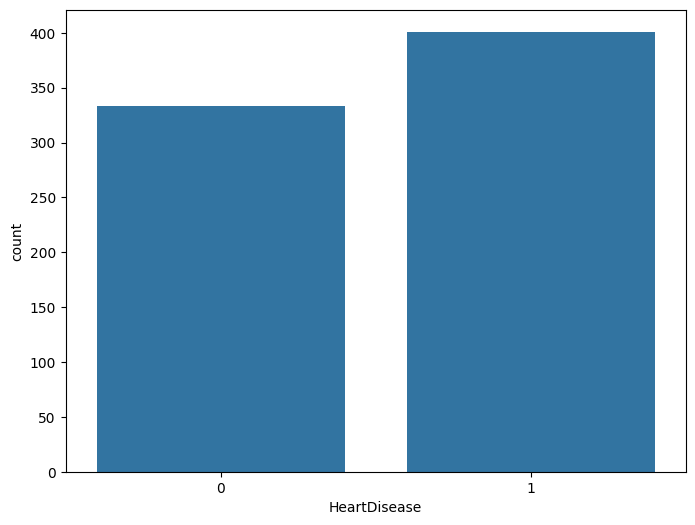

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(x=train_set_df["HeartDisease"])
plt.show()

In [11]:
train_set_df["HeartDisease"].replace({0: "No disease", 1: "Heart Disease"}).value_counts()

HeartDisease
Heart Disease    401
No disease       333
Name: count, dtype: int64

From this, we can see there is a slight imbalance in the data with more observations of heart disease (target = 1).

---

## Discretisation of Oldpeak Feature

From the EDA, it was found that the Oldpeak feature was heavily imbalanced with a very high quantity of zero values. It was therefore decided that the best plan of action was to discretise the numerical data into categories.

In [21]:
import numpy as np
from feature_engine.discretisation import ArbitraryDiscretiser
from sklearn.pipeline import Pipeline

map_dict = {0: "≤ 0", 1: "0 ≤ 1.5", 2: "> 1.5"}

pipeline = Pipeline([
    ( 'arbd', ArbitraryDiscretiser(binning_dict={'Oldpeak':[-np.inf, 0, 1.5, np.inf]}) )
])

train_set_df = pipeline.fit_transform(train_set_df)
train_set_df["Oldpeak"] = train_set_df["Oldpeak"].replace(to_replace=map_dict)
train_set_df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,70,M,ASY,140.0,213.0,high diabetes risk,Normal,157,Y,> 1.5,Flat,1
1,46,M,ASY,115.0,230.0,low diabetes risk,Normal,113,Y,0 ≤ 1.5,Flat,1
2,65,F,NAP,160.0,360.0,low diabetes risk,LVH,151,N,0 ≤ 1.5,Up,0


---

In [22]:
test_set_df = pipeline.fit_transform(test_set_df)
test_set_df["Oldpeak"] = test_set_df["Oldpeak"].replace(to_replace=map_dict)
test_set_df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,55,M,ASY,115.0,248.0,high diabetes risk,Normal,155,N,0 ≤ 1.5,Flat,1
1,66,M,ASY,120.0,302.0,low diabetes risk,LVH,151,N,0 ≤ 1.5,Flat,0
2,51,M,ASY,110.0,279.0,high diabetes risk,Normal,92,N,≤ 0,Flat,1


NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
